In [0]:
import numpy as np

In [0]:
class Camera():
  def __init__(self,pixel_h,pixel_w,pixel_density,aperture_h,aperture_w,aperture_density):
    
    self.pixel_h = pixel_h
    self.pixel_w = pixel_w
    self.pixel_density = pixel_density
    self.pixels = []
    
    
    def create_pixels():
      xs = np.linspace(-self.pixel_w/2,self.pixel_w/2,pixel_density)
      ys = np.linspace(-self.pixel_h/2,self.pixel_h/2,pixel_density)
      self.pixels = []
      for x in xs:
        for y in ys:
          self.pixels.append(np.array([x,y,0]))
    create_pixels()
    
    #apetures use relative coordinates
    self.aperture_density = aperture_density
    self.aperture_h = aperture_h
    self.aperture_w = aperture_w
    self.apertures = []
    def create_apertures():
      #20 is magic number
      xs = np.linspace(-self.aperture_w/2,self.aperture_w/2,self.aperture_density)
      ys = np.linspace(-self.aperture_h/2,self.aperture_h/2,self.aperture_density)
      for x in xs:
        for y in ys:
          self.apertures.append(np.array([x,y,10])) #camera looks down its local z axis
    create_apertures() 
    
    self.abs_x_pos = 0
    self.abs_y_pos = 0
    self.abs_z_pos = 0
    self.abs_x_rot = 0
    self.abs_y_rot = 0
    self.abs_z_rot = 0
    
    self.abs_pixels_pos = []
    self.abs_apertures_pos = []
   
  def set_position(self,x,y,z):
    self.abs_x_pos = x
    self.abs_y_pos = y
    self.abs_z_pos = z
    initialise()
    
   
  def initialise(self):
    self.abs_pixels_pos = [pixel+np.array([self.abs_x_pos,self.abs_y_pos,self.abs_z_pos]) for pixel in self.pixels]
    self.abs_apertures_pos = [aperture+np.array([self.abs_x_pos,self.abs_y_pos,self.abs_z_pos]) for aperture in self.apertures]
    
  def rotate(self,x_rad,y_rad,z_rad):
    rot_mat_x = np.array([[1,0,0],[0,np.cos(x_rad),-np.sin(x_rad)],[0,np.sin(x_rad),np.cos(x_rad)]])
    rot_mat_y = np.array([[np.cos(y_rad),0,np.sin(y_rad)],[0,1,0],[-np.sin(y_rad),0,np.cos(y_rad)]])
    rot_mat_z = np.array([[np.cos(z_rad),-np.sin(z_rad),0],[np.sin(z_rad),np.cos(z_rad),0],[0,0,1]])
    self.pixels = [rot_mat_x*rot_mat_y*rot_mat_z*pixel for pixel in self.pixels]
    self.apertures = [rot_mat_x*rot_mat_y*rot_mat_z*aperture for aperture in self.apertures]
    self.x_rot += x_rad
    self.y_rot += y_rad
    self.z_rot += z_rad
    initialise()
    
    
      
 

In [0]:
class Light():    
  def __init__(self):
    self.abs_x = 0
    self.abs_y = 0
    self.abs_z = 0
    self.x_rot = 0
    self.y_rot = 0
    self.z_rot = 0
    self.abs_sources_pos = []
    self.sources = [np.array([0,0,0])]
  
  def __init__(self,side_num):
    self.abs_x = 0
    self.abs_y = 0
    self.abs_z = 0
    self.x_rot = 0
    self.y_rot = 0
    self.z_rot = 0
    self.abs_sources_pos = []
    self.sources = []
    #20 is magic number
    xs = np.linspace(-side_num/20,side_num/20,side_num)
    ys = np.linspace(-side_num/20,side_num/20,side_num)
    for x in xs:
      for y in ys:
        sources.append(np.array([x,y,0]))
  
  def initialise(self):
    self.sources = [source+np.array([self.abs_x,self.abs_y,self.abs_z]) for source in self.sources]
  
  def set_position(self,x,y,z):
    self.abs_x = x
    self.abs_y = y
    self.abs_z = z
    initialise()
    
  def rotate(self,x_rad,y_rad,z_rad):
    rot_mat_x = np.array([[1,0,0],[0,np.cos(x_rad),-np.sin(x_rad)],[0,np.sin(x_rad),np.cos(x_rad)]])
    rot_mat_y = np.array([[np.cos(y_rad),0,np.sin(y_rad)],[0,1,0],[-np.sin(y_rad),0,np.cos(y_rad)]])
    rot_mat_z = np.array([[np.cos(z_rad),-np.sin(z_rad),0],[np.sin(z_rad),np.cos(z_rad),0],[0,0,1]])
    self.abs_sources_pos = [rot_mat_x*rot_mat_y*rot_mat_z*source for source in self.sources]
    self.x_rot += x_rad
    self.y_rot += y_rad
    self.z_rot += z_rad
    initialise()
  

In [0]:
class solid_cube():
  def __init__(self):
    self.d1_width = 0
    self.d2_width = 0
    self.d3_width = 0
    self.abs_x = 0
    self.abs_y = 0
    self.abs_z = 0
  
  def set_sides(d1,d2,d3):
    set
    

In [0]:
class solid_sphere():
  def __init__(self):
    self.abs_x = 0
    self.abs_y = 0
    self.abs_z = 0
    self.radius = 0
    
  def set_position(self,x,y,z):
    self.abs_x = x
    self.abs_y = y
    self.abs_z = z
    
  def set_radius(self,r):
    self.radius = r
    
  def get_normal(self,pos):
    return (pos-np.array([self.abs_x,self.abs_y,self.abs_z]))/abs(pos-np.array([self.abs_x,self.abs_y,self.abs_z]))   
  
  def check_intersection(self,ray):
    ray_start,ray_direction = ray[0],ray[1]
    a = np.sum(ray_direction**2)
    b = 2*(ray_direction[0]*(ray_start[0]-self.abs_x)+ray_direction[1]*(ray_start[1]-self.abs_y)+ray_direction[2]*(ray_start[2]-self.abs_z))
    c = np.sum((ray_start-np.array([self.abs_x,self.abs_y,self.abs_z]))**2)-self.radius**2
    discrim = b**2-4*a*c
    
    x = lambda u: ray_start[0]+u*ray_direction[0]
    y = lambda u: ray_start[1]+u*ray_direction[1]
    z = lambda u: ray_start[2]+u*ray_direction[2]
    #may also need to give normals
    if discrim < 0:
      return []
    
    elif discrim == 0:
      u = (-b)/(2*a)
      
      return [np.array([x(u),y(u),z(u)])]
    
    elif discrim >0:
      u1 = (-b+np.sqrt(b**2-4*a*c))/(2*a)
      u2 = (-b-np.sqrt(b**2-4*a*c))/(2*a)
      return [np.array([x(u1),y(u1),z(u1)]),np.array([x(u2),y(u2),z(u2)])]
    

In [0]:
class Space():
  def __init__(self):
    self.solid_objects = []
    self.light_sources = []
    self.camera = None
    self.intersections = [] #List of arrays,(pos, direction)
  def initialise(self):
    for object in self.solid_objects+self.light_sources+self.camera:
      object.initialise()

In [0]:
class Renderer():
  def calculate_intersections(aspace):
    #This section should be converted to multithreaded 
    rays = []
    pixels = aspace.camera.abs_pixels_pos
    apertures = aspace.camera.abs_apertures_pos
    for pixel in pixels:
      for aperture in apertures:
        ray_start = pixel
        ray_direction = aperture-pixel
        rays.append((ray_start,ray_direction))
    #Now use parametric equation of ray to check for intersects for the object in aspace.solid_objects
    #Add these to a list of intersections 
    
        
     
        
      

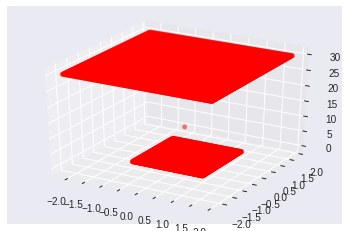

In [9]:
camera1 = Camera(2,2,100,0.1,0.1,1)
camera1.initialise()
data = camera1.abs_apertures_pos + camera1.abs_pixels_pos

xs = [pos[0] for pos in data]
ys = [pos[1] for pos in data]
zs = [pos[2] for pos in data]
rays = []
pixels = camera1.abs_pixels_pos
apertures = camera1.abs_apertures_pos
for pixel in pixels:
  for aperture in apertures:
    ray_start = pixel
    ray_direction = aperture-pixel
    rays.append((ray_start,ray_direction))

        


u = 3
for ray in rays:
  pos = ray[0]+ray[1]*u
  xs.append(pos[0])
  ys.append(pos[1])
  zs.append(pos[2])
  
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(xs, ys, zs, c='r', marker='o')

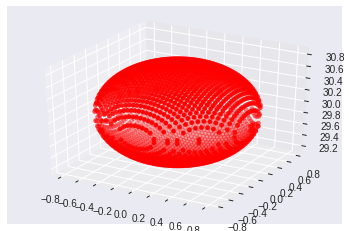

In [10]:
sphere1 = solid_sphere()
sphere1.set_radius(0.8)
sphere1.set_position(0,0,30)
intersects = []
for ray in rays:
  intersects += sphere1.check_intersection(ray)

xs1 = [pos[0] for pos in intersects]
ys1 = [pos[1] for pos in intersects]
zs1 = [pos[2] for pos in intersects]

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter(xs1,ys1,zs1,c='r',marker='o')

In [11]:
hits = []
for ray in rays:
  res = sphere1.check_intersection(ray)
  if res != []:
    hits.append(1)
  else:
    hits.append(2)

hits = np.array(hits)
hits =hits.reshape((1000,1000))
plt.imshow(hits)

    


ValueError: ignored

In [0]:
camera1.abs_apertures_pos